# Getting started with numpy

This notebook highlights the difference between stating a problem with brute-force script and with numpy.

## The problem
The problem solved is the **random walk**, which can be illustrated by the toy "marbles and nails".
A marble is left rolling on a plane with evenly distributed, staggerred nails.
At each nail, the marble can go left or right.

> note that one **row** is refers to two staggered layers of nails. Using this simple convention, input and output positions of a rows are matching.

```
           ______________
|   | . |     
      .        Row 1
  |  . |
   .       ______________
| . |   |
   .           Row 2 
  | .  |
     .     _______________
|   |o  |
               Row 3
```

### Initial condition
Marbles falls always on the same spot
```
    .
    .
    .
    o


|   |   |
    
  |   |
  
|   |   |
```

### Collision rule
The marble shows an equal probability to go left or right of the nail.
```
   |   |   
     O
 |50%|50%|
    
   |   |
  
 |   |   |
```
After a row - i.e. two layers - , the marble porbability is 25% on the left, 50% same position, and 25% on the right
```
   |   |      ___________
     O
 |50%|50%|  
    
25%|50%|25%   ____________
  
 |   |   |
```


# solving without numpy
In this first section , we will see how the problem is solved with python basic objects.

## A mockup step

As a first step, It is very good practice to create a *non-working version* of the function we want.
You can learn more about this strategy by searching **dependency inversion**.
The following code shows a function `marble_and_nails_mockup`with the proper inputs and output (also called **signature**).
The function is called and  output plotted.

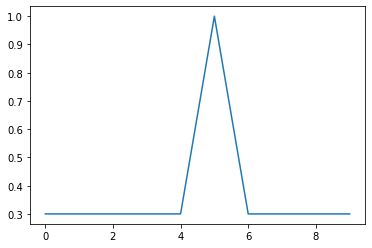

In [10]:
import matplotlib.pyplot as plt
import numpy as np
def marble_and_nails_mockup(
        marbles_nb=1000,
        grid_width=10, 
        rows_nb=30):
    """simulate the repatition of marbles through a grid.
    
    :param: marbles_nb, int, number of marbles to run
    :param: grid_width, int, size of the grid
    :param: rows_nb, int, number of nail rows
    
    :returns: distribution, list of floats
       the observed distribution of marbles
    """
    
    # version deroulee 
    distribution = list()
    for i in range(10):
        distribution.append(0.3)
        
    # version list comprehension 
    distribution = [0.3 for _ in range(grid_width)]
    
    distribution[5]=1.
    
    return distribution

distribution = marble_and_nails_mockup(marbles_nb=2000)
plt.plot(distribution)
plt.show()         



## the RAW version

The raw version follows this algorithm:
    
- An outer loop is creating new marbles to process.
    - An inner loop is updating the marble position after each row.
    - The final postion is accounted in the `distribution` variable.
- the distribution is normalized.

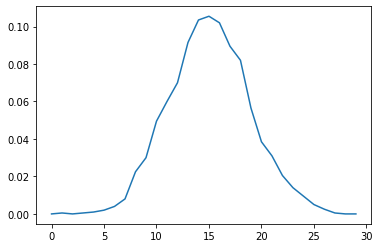

In [11]:
import random as rnd
def marble_and_nails_raw(
        marbles_nb=1000,
        grid_width=30, 
        rows_nb=30):
    """simulate the repartition of marbles through a grid.
    
    :param: marbles_nb, int, number of marbles to run
    :param: grid_width, int, size of the grid
    :param: rows_nb, int, number of nail rows
    
    :returns: distribution, list of floats
       the observed distribution of marbles
    """
    # creation of the list holding the results
    distribution = [0. for _ in range(grid_width)]

    for marble in range(marbles_nb):  #< --- loop on marble
        x_position = int(grid_width*0.5) # initial position
        for row in range(rows_nb):  #< --- loop on rows
            trial = rnd.random()         
            if trial > 0.75:
                x_position += 1
            elif trial < 0.25:
                 x_position -= 1
            else:
               pass

            if x_position > grid_width-1:
                x_position = grid_width-1
            if x_position < 0:
                x_position = 0
        
        
        final_slot = x_position 
       
        distribution[final_slot] += 1
    
    # normalize
    distribution = [item/marbles_nb for item in distribution]

    return distribution

distribution = marble_and_nails_raw(marbles_nb=2000)
plt.plot(distribution)
plt.show()         



# using numpy
Now see how we would write it with numpy.

The basic trick is :
- to find what can be treated simulatenously. This is called *vectorization*. **There is no point in using numpy is you do not have at least one vectorization dimension!**
- then find if the operation you intend is a feature of numpy. 
In other words you will search if someone made available a C-compiled version of what you need.

In the example of marbles and nails, our vectorization will be done considering all the marbles at the same time.
The numpy array will represent the position of all the marbles at the same instant, I.E, row number.

Fist thin gsfirst, lets import numpy using the namespace `np`.

In [2]:
import numpy as np

## initialization

Find first how to create a numpy array of size `20`  filled with a given value, such as `3.1415`.

In [1]:
myarray= ___
print(myarray)

## The random step

See if you can now create a numpy array of 20 random numbers, *generated at the same time*.

In [12]:
myarray= ___
print(myarray)

## Logic and arrays

Our example deals with logic.
But how can you write `if` statements in a vectorized fashion?

### logic within the array

Assume you have an array A.
How would ensure that all elements of A are between 0. and 1.? Since it is about "clipping value to a custom interval, The keyword to search on the internet is "numpy clip"

In [13]:
array_a = np.array([-0.01, 0.06, 0.8, 0,99, 1.0, 1.0001])
array_a = ___
print(array_a)

### logic with an other  array
Assume you have two arrays A and B. 
How could you nullify A elements at all places where B elements are greater/equal to 4?

How could you nullify A elements at all places **where** B elements are greater/equal to A?


In [14]:
array_a = np.array([6, 4, 7, 2, 2, 8, 3, 1, 3])
array_b = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

array_a = ___

print(array_a)


## distribution

Let's get serious now.
Assume you have an array of integers. How could you plot the distribution , in other words the **histogram**,  of these numbers?


In [15]:
array_a = np.array([3, 3, 7, 7, 7])
___



''

## Jump!

Now you have all the elements to solve your problem with numpy.
The vectorization is done on the marbles. In other words remove the loop on marbles by computing the position of all marbles simultaneously at each row.

In [16]:
import numpy as np

def marble_and_nails_np(
        marbles_nb=100,
        grid_width=100, 
        rows_nb=10):
    """simulate the repatition of marbles through a grid.
    
    :param: marbles_nb, int, number of marbles to run
    :param: grid_width, int, size of the grid
    :param: rows_nb, int, number of nail rows
    
    :returns: distribution, list of floats
       the observed distribution of marbles
    """
    
    
    # creation of the list holding the results
    marble_position = np.ones(marbles_nb)*int(grid_width*0.5)
    
    for row in range(rows_nb):  #< --- loop on rows
        ____
    
    
    
    distribution = np.histogram(
        marble_position, 
        bins=grid_width,
        range=(0, grid_width-1))[0]/marbles_nb
    return distribution

# distribution_ref = marble_and_nails_raw(
#     marbles_nb=200,
#     grid_width=100,
#     rows_nb=10)
# distribution = marble_and_nails_np(
#     marbles_nb=200,
#     grid_width=100,
#     rows_nb=10)
# plt.plot(distribution_ref)
# plt.plot(distribution)
# plt.show()         



If this was too easy, add a second level of vectorization by computing *all* the rows at the same time.

# selection in np.arrays by filtering


In [26]:
import pprint


In [29]:
shape = 10
rand = np.random.rand(shape)
dic_source = dict()
for i in range(7):
    dic_source["value_"+str(i)] =  i*np.ones(shape)

print(rand)
pprint.pprint(dic_source)

[0.0319517  0.13130383 0.53642272 0.63503553 0.15966465 0.77550746
 0.87385039 0.49263296 0.20098469 0.97447916]
{'value_0': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'value_1': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'value_2': array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 'value_3': array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]),
 'value_4': array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]),
 'value_5': array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]),
 'value_6': array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])}


Create  a new dictionnary of arrays, limitet to the position where the **rand** array is over 0.5

In [30]:
dic_target = dict()
___
for key in dic_source:
    ___
pprint.pprint(dic_target)

{}
